# El dataset de MNIST

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
#Dataframe de imagenes de numeros
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
len(mnist.train.images)

55000

In [6]:
len(mnist.test.images)

10000

In [21]:
im_temp = mnist.train.images[0]
lab_temp=mnist.train.labels[0]
print(lab_temp) #Array de 0-9 la posicion 1 corresponde al numero 7 por lo tanto lab_temp=7
print(im_temp) #pixeles de imagen en array lineal o lista

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.      

In [11]:
from skimage import io
import numpy as np

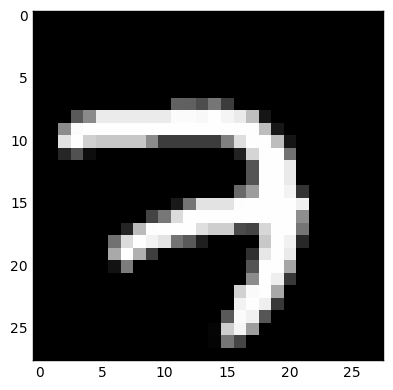

In [19]:
io.imshow(np.reshape(im_temp, (28,28))).figure  #imagen temporal de 28*28 px, se usa np.reshape para convertir array lineal en matriz

# Una red neuronal con Tensor Flow - v1
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
* El dataset se puede pensar como 55000 filas y 784 columnas.
* Cada dato del datset es un número real entre 0 y 1.

Se utilizara funcion de sofmax, la cual sirve como regresion logistica en las redes neuronales, prediciendo la prob de que un elemento pertenezca a una clase

y = softmax(W * x + b)

In [23]:
dim_input = 784 #dimension de pixeles de array lineal de cada imagen
n_categories = 10 #cantidad de categorias en este caso (0-9)

In [24]:
x = tf.placeholder(tf.float32, [None, dim_input]) #plcaholder de los valores de entrada

In [25]:
W = tf.Variable(tf.zeros([dim_input,n_categories])) 
b = tf.Variable(tf.zeros([n_categories]))

In [26]:
softmax_args = tf.matmul(x,W) + b # -->  y = softmax(W * x + b)
y_hat = tf.nn.softmax(softmax_args) #predicccion

#### Entrenando la red neuronal
* Loss / Cost <- objetivo minimizar las pérdidas

In [27]:
from IPython.display import display, Math, Latex

In [28]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

<IPython.core.display.Math object>

In [30]:
y_ = tf.placeholder(tf.float32, [None, 10]) # y real

In [31]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1])) #métrica para reflejar la precisión de los pronósticos 

In [ ]:
#tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [32]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [33]:
session = tf.InteractiveSession()

In [37]:
tf.initialize_all_variables().run()

In [38]:
for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(150) #se utilizan los batch en redes neuronales para evitar entrenar dataset muy grandes
    session.run(train_step, feed_dict={x:batch_x, y_: batch_y})

#### Evaluando la red neuronal



In [48]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1)) #predicciones correctas entre prediccion(y_hat) y real(y_)

print(session.run(correct_predictions, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

[ True  True  True ...,  True  True  True]


In [49]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.924
